In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_caffeine_intake = pd.read_csv('data/caffeine_intake.csv')
df_coffee_health = pd.read_csv('data/coffee_health.csv')
df_sleep_efficiency = pd.read_csv('data/sleep_efficiency.csv')
df_sleep_health_lifestyle = pd.read_csv('data/sleep_health_lifestyle.csv')
df_student_habits_performance = pd.read_csv('data/student_habits_performance.csv')

In [3]:
df_coffee_health.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [4]:
df_sleep_efficiency.head()

ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol consumption Smoking status  Exercise frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0

In [5]:
df_student_habits_performance.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [6]:
df_student_habits_performance.shape

(1000, 16)

In [3]:
import numpy as np
import pandas as pd

def generate_caffeine_and_sleep(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Map categorical features to numeric influences
    diet_map = {'Poor': -1, 'Fair': 0, 'Good': 1}
    internet_map = {'Poor': -1, 'Average': 0, 'Good': 1}

    # Normalize numeric features
    study = df['study_hours_per_day']
    social = df['social_media_hours']
    netflix = df['netflix_hours']
    sleep = df['sleep_hours']
    exercise = df['exercise_frequency']
    mental = df['mental_health_rating']
    part_job = df['part_time_job'].map({'Yes': 1, 'No': 0})
    diet = df['diet_quality'].map(diet_map).fillna(0)
    internet = df['internet_quality'].map(internet_map).fillna(0)

    # Caffeine intake formula
    caffeine = (
        0.4 * study +
        0.3 * social +
        0.2 * netflix +
        0.2 * (10 - sleep) +
        1.5 * part_job +
        np.random.normal(0, 0.8, len(df))
    )

    # Sleep quality formula
    sleep_quality = (
        0.5 * sleep +
        0.3 * exercise +
        0.2 * mental -
        0.3 * caffeine +
        0.5 * diet +
        0.3 * internet +
        np.random.normal(0, 0.8, len(df))
    )

    # Scale both to 1–10
    df['caffeine_intake'] = np.clip(caffeine, 1, 10).round(1)
    df['sleep_quality'] = np.clip(sleep_quality, 1, 10).round(1)

    return df


In [4]:
def expand_dataset(df: pd.DataFrame, target_size: int = 10000) -> pd.DataFrame:
    df = df.copy()
    n_current = len(df)
    n_needed = target_size - n_current

    # --- 1️⃣ Sample existing data to create new ones ---
    new_data = df.sample(n=n_needed, replace=True, random_state=42).reset_index(drop=True)

    # --- 2️⃣ Add small Gaussian noise to numeric columns ---
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if col not in ['student_id']:
            noise = np.random.normal(0, df[col].std() * 0.05, n_needed)
            new_data[col] = np.clip(new_data[col] + noise, df[col].min(), df[col].max())

    # --- 3️⃣ Add random outliers (about 8%) ---
    n_outliers = int(0.08 * n_needed)
    outlier_rows = new_data.sample(n=n_outliers, replace=False, random_state=7)
    for col in ['caffeine_intake', 'sleep_quality', 'exam_score']:
        if col in new_data.columns:
            new_data.loc[outlier_rows.index, col] = np.clip(
                new_data.loc[outlier_rows.index, col] + np.random.normal(0, 3, n_outliers),
                1, 10 if col != 'exam_score' else 100
            )

    # --- 4️⃣ Create unique student IDs only for new_data ---
    start_id = 1000 + n_current  # continue from existing ones
    new_data['student_id'] = [f"S{start_id + i}" for i in range(n_needed)]

    # --- 5️⃣ Combine old + new ---
    expanded_df = pd.concat([df, new_data], ignore_index=True)
    expanded_df = expanded_df.reset_index(drop=True)

    return expanded_df


In [5]:
df_new = generate_caffeine_and_sleep(df_student_habits_performance)
df_expanded = expand_dataset(df_new, target_size=10000)
print(len(df_expanded))  # ✅ 10000


10000


In [10]:
df_expanded.tail()

student_id        age  gender  study_hours_per_day  social_media_hours  \
9995     S10995  17.846020  Female             4.161590            3.744497   
9996     S10996  23.931339  Female             2.740808            4.274268   
9997     S10997  17.961911    Male             2.652780            3.428343   
9998     S10998  23.840284    Male             3.272166            3.026294   
9999     S10999  23.899012    Male             2.524165            2.811686   

      netflix_hours part_time_job  attendance_percentage  sleep_hours  \
9995       3.381569           Yes              84.255976     5.464600   
9996       0.988854            No              89.618077     6.139750   
9997       2.006351            No              83.651054     6.165812   
9998       0.062457            No              97.651796     6.813830   
9999       0.809123            No              99.715799     8.105439   

     diet_quality  exercise_frequency parental_education_level  \
9995         Good            2.108087              High School   
9996         Good            2.066969                 Bachelor   
9997         Good            0.075819                 Bachelor   
9998         Fair            6.000000              High School   
9999         Fair            2.955994                      NaN   

     internet_quality  mental_health_rating extracurricular_participation  \
9995             Good              5.023594                            No   
9996          Average              9.711150                            No   
9997          Average              1.214190                            No   
9998          Average              7.157174                            No   
9999             Good              1.932590                            No   

      exam_score  caffeine_intake  sleep_quality  
9995   67.449357         5.289766       4.602485  
9996   59.579016         2.598692       6.106356  
9997   39.846030         2.725046       3.944828  
9998   82.664965         2.286465       6.688605  
9999   62.161020         3.202944       4.218933

In [11]:
df_student_habits_performance.describe()

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [12]:
df_coffee_health.drop(columns=["Stress_Level"],inplace=True)

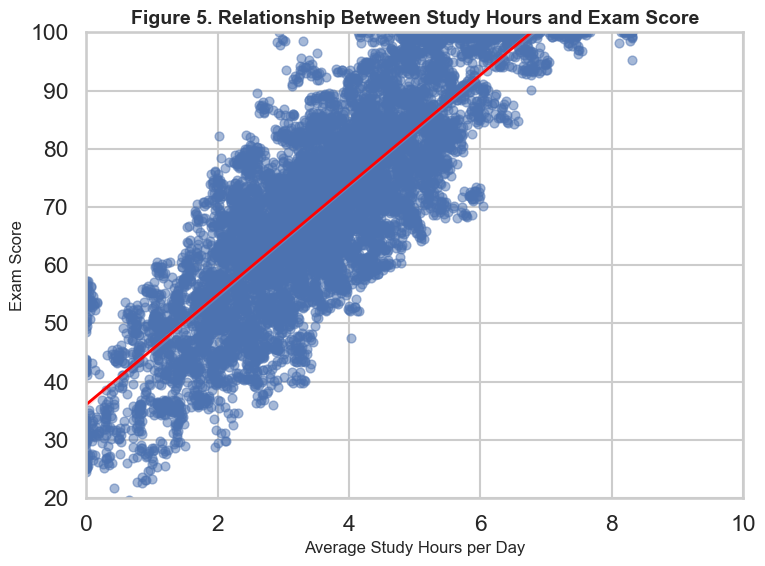

In [11]:
# Set style for academic publication
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(8, 6))
ax = sns.regplot(
    data=df_expanded,
    x="study_hours_per_day",
    y="exam_score",
    scatter_kws={"alpha": 0.5, "s": 40},
    line_kws={"color": "red", "lw": 2}
)

plt.title("Figure 5. Relationship Between Study Hours and Exam Score", fontsize=14, weight='bold')
plt.xlabel("Average Study Hours per Day", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.xlim(0, 10)
plt.ylim(20, 100)
plt.tight_layout()
plt.savefig('docs/final/fig_study_vs_score.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
def generate_focus_and_stress(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # --- Base normalization ---
    Sd = (df['sleep_hours'] - df['sleep_hours'].min()) / (df['sleep_hours'].max() - df['sleep_hours'].min())
    Sq = (df['sleep_quality'] - df['sleep_quality'].min()) / (df['sleep_quality'].max() - df['sleep_quality'].min())

    # --- Map caffeine_intake (1–10) → mg/day range [100, 500] ---
    C_mg = 50 + 50 * df['caffeine_intake']

    # --- Caffeine functions (core model) ---
    fC = np.exp(-((C_mg - 200) ** 2) / (2 * (100 ** 2)))   # Optimal alertness curve
    gC = np.maximum(0, (C_mg - 300) / 200)                 # Stress increase after 300 mg

    # --- Map categorical features ---
    diet_map = {'Poor': -1, 'Fair': 0, 'Good': 1}
    internet_map = {'Poor': -1, 'Average': 0, 'Good': 1}
    part_job_map = {'Yes': 1, 'No': 0}
    df['diet_score'] = df['diet_quality'].map(diet_map).fillna(0)
    df['internet_score'] = df['internet_quality'].map(internet_map).fillna(0)
    df['part_job_score'] = df['part_time_job'].map(part_job_map).fillna(0)

    # --- Normalize continuous inputs ---
    study = (df['study_hours_per_day'] - df['study_hours_per_day'].min()) / (df['study_hours_per_day'].max() - df['study_hours_per_day'].min())
    social = (df['social_media_hours'] - df['social_media_hours'].min()) / (df['social_media_hours'].max() - df['social_media_hours'].min())
    netflix = (df['netflix_hours'] - df['netflix_hours'].min()) / (df['netflix_hours'].max() - df['netflix_hours'].min())
    attend = (df['attendance_percentage'] - df['attendance_percentage'].min()) / (df['attendance_percentage'].max() - df['attendance_percentage'].min())
    exercise = df['exercise_frequency'] / df['exercise_frequency'].max()
    mental = df['mental_health_rating'] / 10

    # --- Compute base stress & focus (from caffeine + sleep) ---
    Str_p = gC - Sq
    F_p = Sd + Sq - Str_p + fC

    # --- Add effects of other parameters ---

    # Stress increases with distractions, workload, poor diet/internet
    Str_p += (
        + 0.4 * social
        + 0.3 * netflix
        + 0.2 * study
        + 0.3 * df['part_job_score']
        - 0.3 * exercise
        - 0.4 * mental
        - 0.2 * df['diet_score']
        - 0.2 * df['internet_score']
    )

    # Focus improves with exercise, good diet, mental health, attendance
    F_p += (
        + 0.4 * exercise
        + 0.4 * mental
        + 0.3 * attend
        + 0.2 * df['diet_score']
        + 0.2 * df['internet_score']
        - 0.3 * social
        - 0.2 * netflix
        - 0.2 * df['part_job_score']
    )

    # --- Normalize both to [1, 10] ---
    def rescale(x):
        return 1 + 9 * (x - np.min(x)) / (np.max(x) - np.min(x))

    df['stress_proxy'] = np.clip(rescale(Str_p) + np.random.normal(0, 0.2, len(df)), 1, 10)
    df['focus_proxy'] = np.clip(rescale(F_p) + np.random.normal(0, 0.2, len(df)), 1, 10)

    return df


In [7]:
df_focus_stress = generate_focus_and_stress(df_expanded)

In [13]:
df_focus_stress.head()

student_id   age  gender  study_hours_per_day  social_media_hours  \
0      S1000  23.0  Female                  0.0                 1.2   
1      S1001  20.0  Female                  6.9                 2.8   
2      S1002  21.0    Male                  1.4                 3.1   
3      S1003  23.0  Female                  1.0                 3.9   
4      S1004  19.0  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  ...  mental_health_rating extracurricular_participation  \
0         Fair  ...                   8.0                           Yes   
1         Good  ...                   8.0                            No   
2         Poor  ...                   1.0                            No   
3         Poor  ...                   1.0                           Yes   
4         Fair  ...                   1.0                            No   

  exam_score  caffeine_intake sleep_quality  diet_score  internet_score  \
0       56.2              1.8           6.9           0               0   
1      100.0              5.8           3.6           1               0   
2       34.3              1.8           2.8          -1              -1   
3       26.8              1.9           5.8          -1               1   
4       66.4              2.7           3.6           0               1   

   part_job_score  stress_proxy  focus_proxy  
0               0      2.507281     8.064630  
1               0      4.428272     5.716569  
2               0      6.422808     5.147543  
3               0      4.268905     7.234387  
4               0      4.545296     5.964972  

[5 rows x 23 columns]

In [17]:
df_focus_stress["exam_score"].describe()

count    10000.000000
mean        69.434708
std         16.830646
min         18.400000
25%         58.388128
50%         70.094273
75%         81.240603
max        100.000000
Name: exam_score, dtype: float64

In [18]:
df_focus_stress.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'caffeine_intake', 'sleep_quality', 'diet_score', 'internet_score',
       'part_job_score', 'stress_proxy', 'focus_proxy'],
      dtype='object')

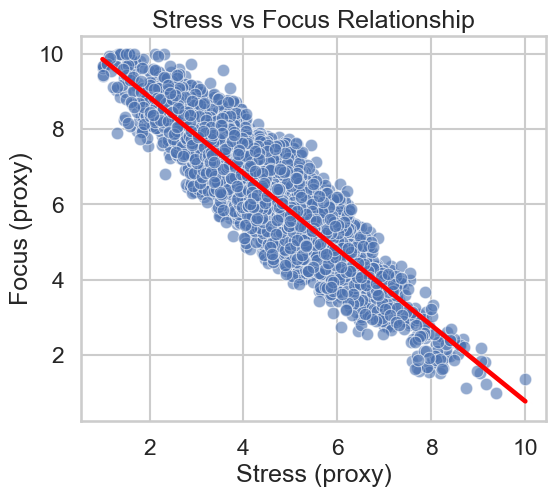

In [14]:
# Use the enhanced dataframe (after running generate_focus_and_stress)
df_viz = df_focus_stress.copy()

# --- 1. Focus vs Stress (overall relationship) ---
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_viz, x='stress_proxy', y='focus_proxy', alpha=0.6)
sns.regplot(data=df_viz, x='stress_proxy', y='focus_proxy', scatter=False, color='red')
plt.title("Stress vs Focus Relationship")
plt.xlabel("Stress (proxy)")
plt.ylabel("Focus (proxy)")
plt.savefig('docs/final/fig_stress_vs_focus.png', dpi=300, bbox_inches='tight')
plt.show()

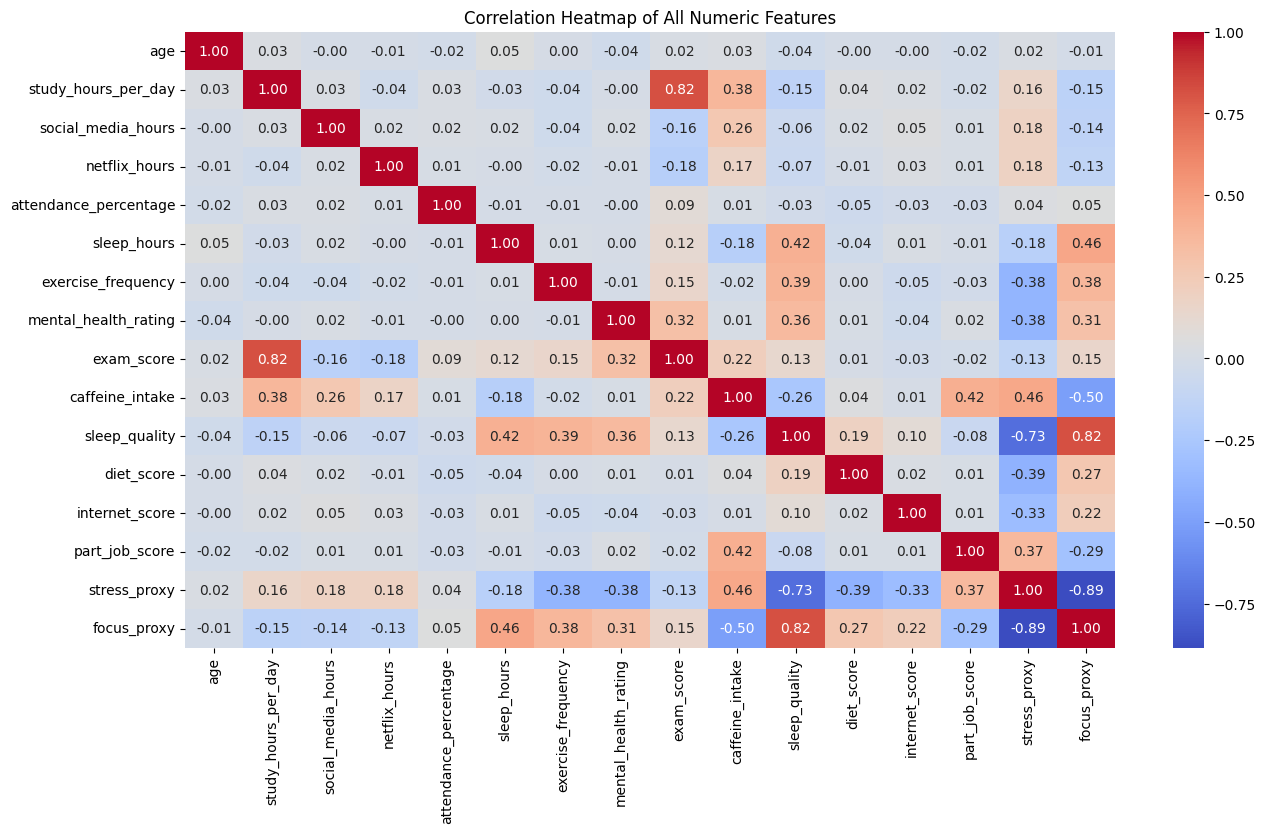

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_focus_stress.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of All Numeric Features")
plt.savefig('docs/final/fig_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

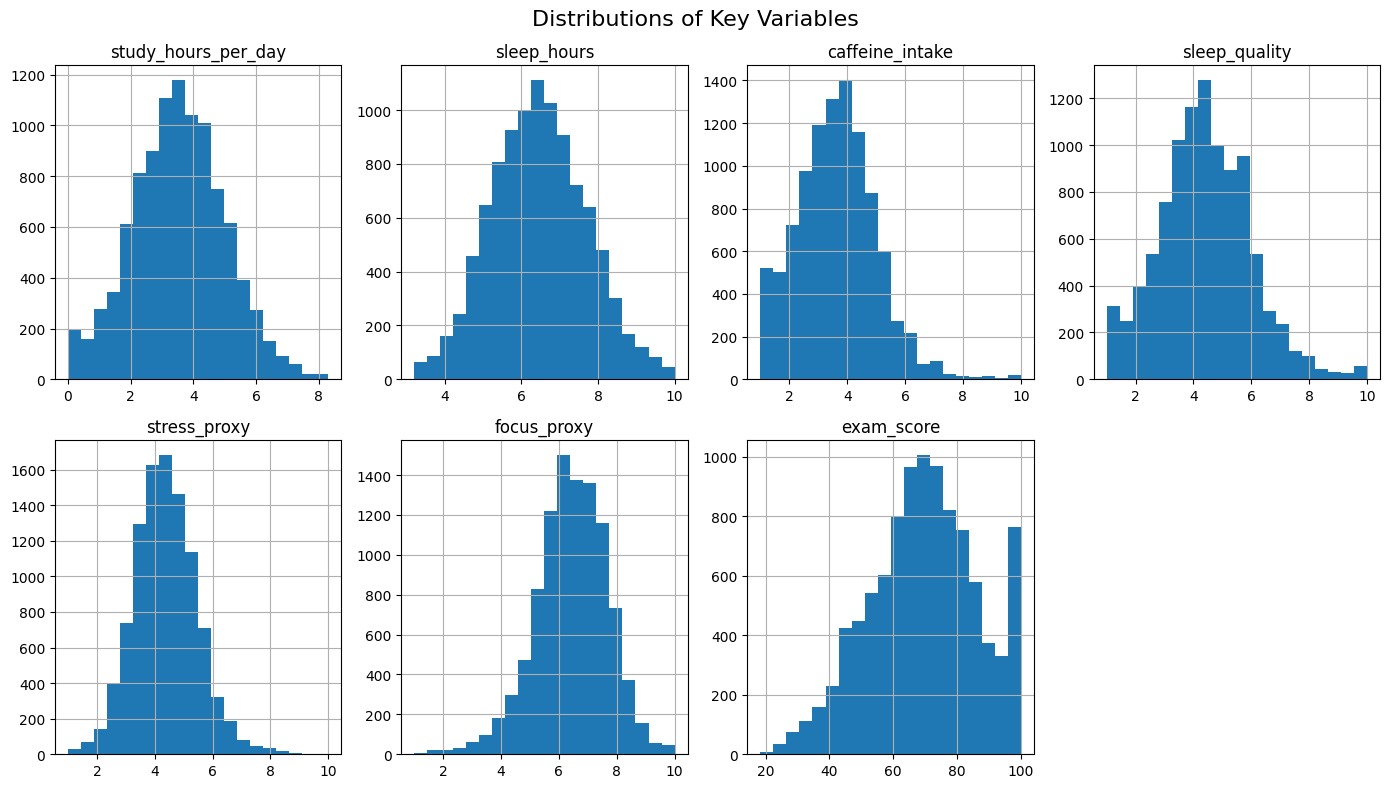

In [8]:
num_cols = ['study_hours_per_day','sleep_hours','caffeine_intake','sleep_quality','stress_proxy','focus_proxy','exam_score']
df_focus_stress[num_cols].hist(bins=20, figsize=(14,8), layout=(2,4))
plt.suptitle("Distributions of Key Variables", fontsize=16)
plt.tight_layout()
plt.savefig('docs/final/fig_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

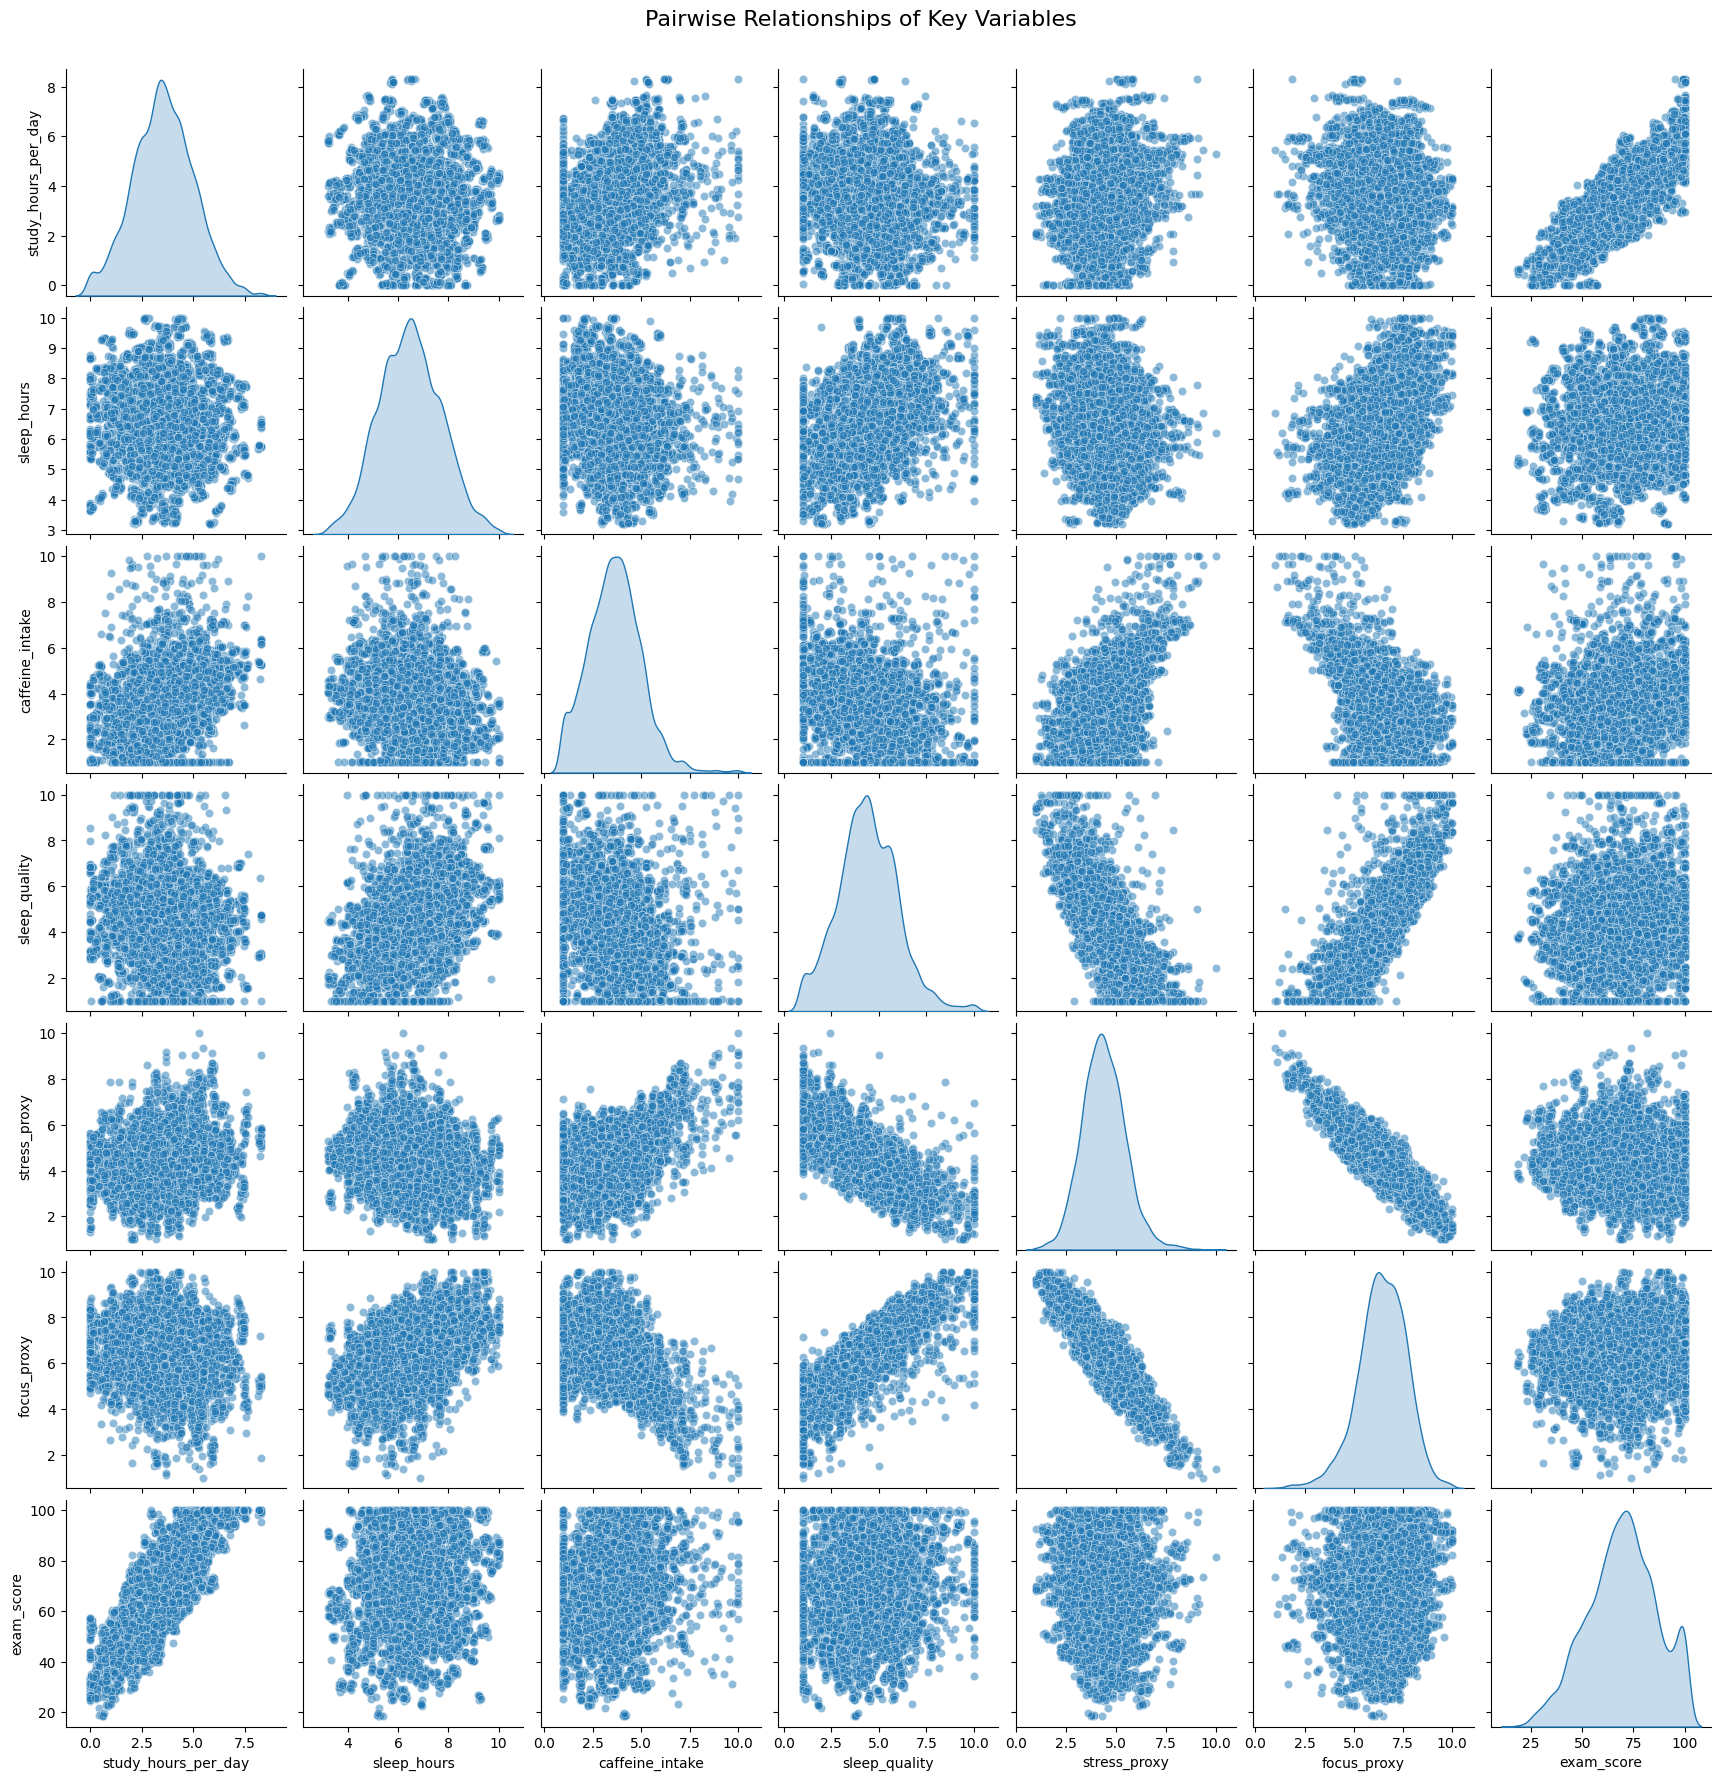

In [9]:
sns.pairplot(df_focus_stress, vars=num_cols, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships of Key Variables", y=1.02, fontsize=16)
plt.savefig('docs/final/fig_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

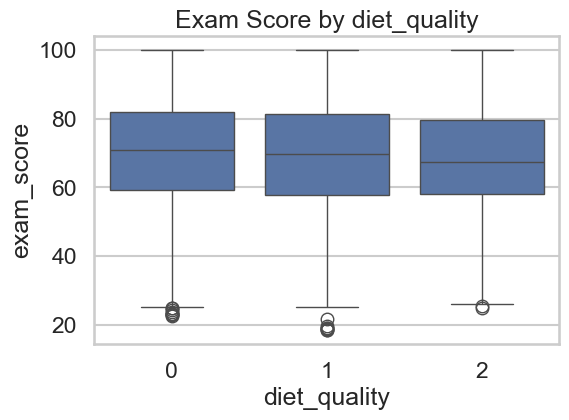

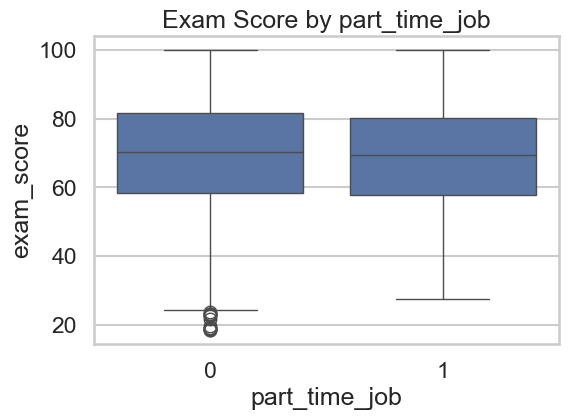

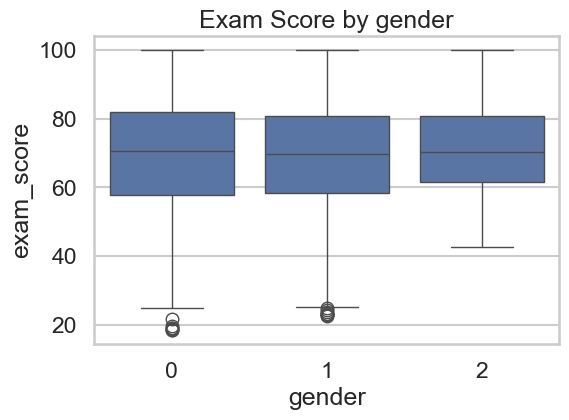

In [19]:
categorical_cols = ['diet_quality', 'part_time_job', 'gender']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_focus_stress, x=col, y='exam_score')
    plt.title(f"Exam Score by {col}")
    plt.savefig(f'docs/final/fig_boxplot_{col.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='stress_proxy', data=df_focus_stress, ci='sd')


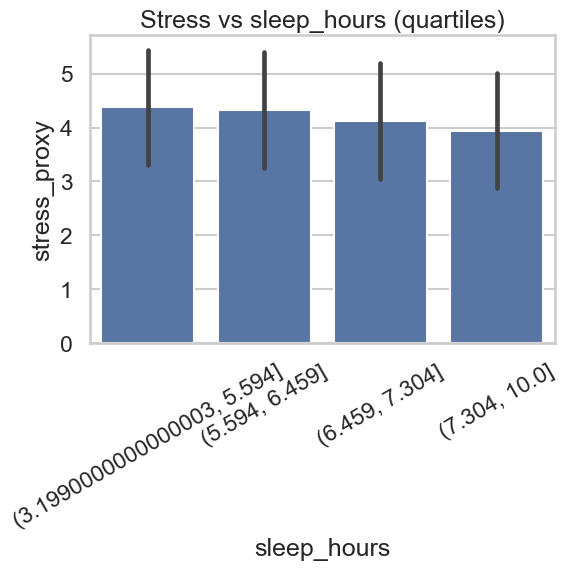

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='focus_proxy', data=df_focus_stress, ci='sd')


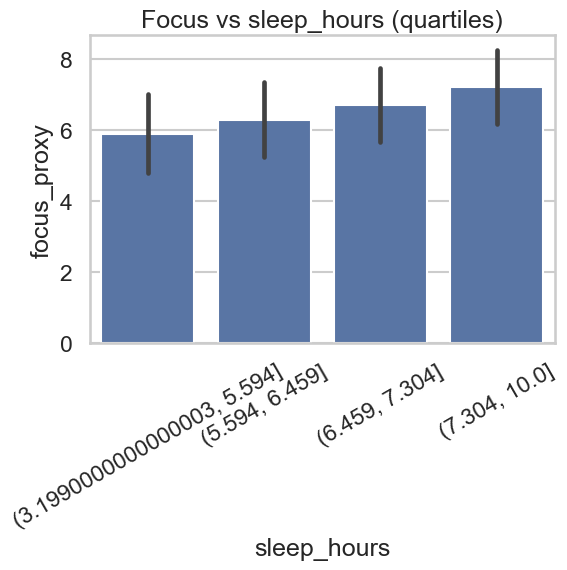

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='stress_proxy', data=df_focus_stress, ci='sd')


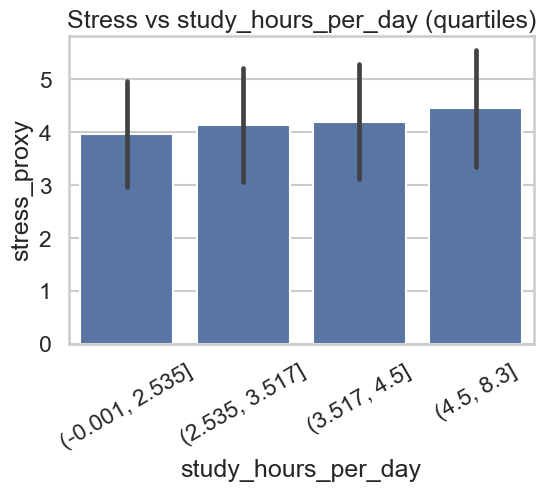

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='focus_proxy', data=df_focus_stress, ci='sd')


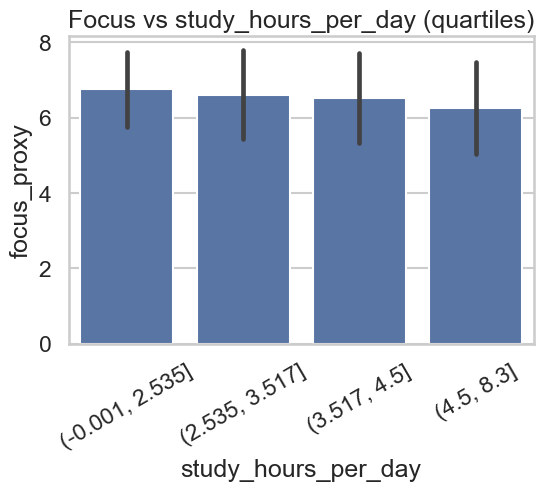

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='stress_proxy', data=df_focus_stress, ci='sd')


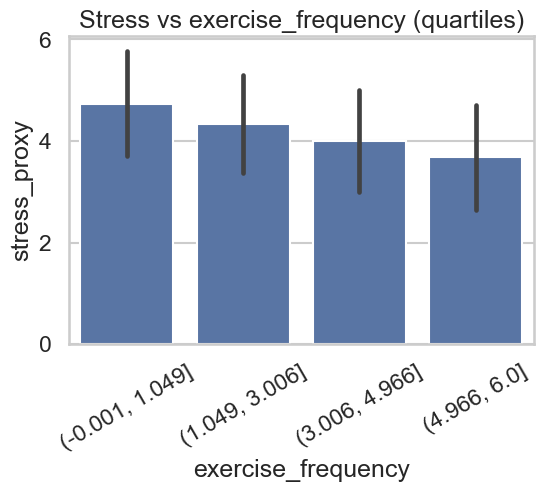

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_31720/3310376233.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='focus_proxy', data=df_focus_stress, ci='sd')


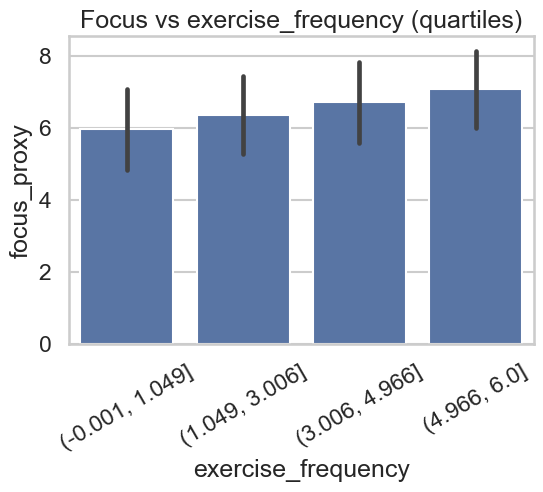

In [24]:
group_cols = ['sleep_hours', 'study_hours_per_day', 'exercise_frequency']
for col in group_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='stress_proxy', data=df_focus_stress, ci='sd')
    plt.title(f"Stress vs {col} (quartiles)")
    plt.xticks(rotation=30)
    plt.show()

    plt.figure(figsize=(6,4))
    sns.barplot(x=pd.qcut(df_focus_stress[col], q=4), y='focus_proxy', data=df_focus_stress, ci='sd')
    plt.title(f"Focus vs {col} (quartiles)")
    plt.xticks(rotation=30)
    plt.show()

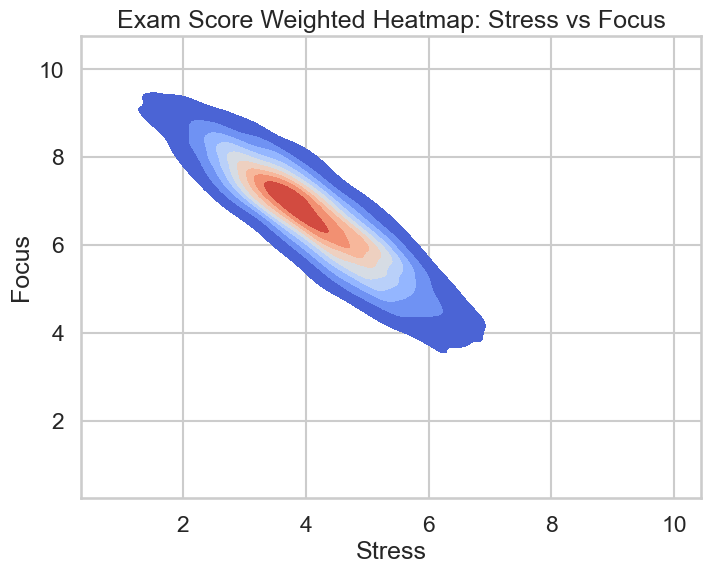

In [25]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x='stress_proxy', y='focus_proxy', weights='exam_score',
    data=df_focus_stress, cmap="coolwarm", fill=True
)
plt.title("Exam Score Weighted Heatmap: Stress vs Focus")
plt.xlabel("Stress")
plt.ylabel("Focus")
plt.show()

In [16]:
#seprate numeric and categorical columns
numeric_cols = df_focus_stress.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_focus_stress.select_dtypes(include=['object']).columns
numeric_cols, categorical_cols

(Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
        'attendance_percentage', 'sleep_hours', 'exercise_frequency',
        'mental_health_rating', 'exam_score', 'caffeine_intake',
        'sleep_quality', 'diet_score', 'internet_score', 'part_job_score',
        'stress_proxy', 'focus_proxy'],
       dtype='object'),
 Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
        'parental_education_level', 'internet_quality',
        'extracurricular_participation'],
       dtype='object'))

In [17]:
#for all catergorical columns, label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df_focus_stress[col] = le.fit_transform(df_focus_stress[col].astype(str))
df_focus_stress.head()

student_id   age  gender  study_hours_per_day  social_media_hours  \
0           0  23.0       0                  0.0                 1.2   
1          11  20.0       0                  6.9                 2.8   
2          22  21.0       1                  1.4                 3.1   
3          33  23.0       0                  1.0                 3.9   
4          44  19.0       0                  5.0                 4.4   

   netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0            1.1              0                   85.0          8.0   
1            2.3              0                   97.3          4.6   
2            1.3              0                   94.8          8.0   
3            1.0              0                   71.0          9.2   
4            0.5              0                   90.9          4.9   

   diet_quality  ...  mental_health_rating  extracurricular_participation  \
0             0  ...                   8.0                              1   
1             1  ...                   8.0                              0   
2             2  ...                   1.0                              0   
3             2  ...                   1.0                              1   
4             0  ...                   1.0                              0   

   exam_score  caffeine_intake  sleep_quality  diet_score  internet_score  \
0        56.2              1.8            6.9           0               0   
1       100.0              5.8            3.6           1               0   
2        34.3              1.8            2.8          -1              -1   
3        26.8              1.9            5.8          -1               1   
4        66.4              2.7            3.6           0               1   

   part_job_score  stress_proxy  focus_proxy  
0               0      2.507281     8.064630  
1               0      4.428272     5.716569  
2               0      6.422808     5.147543  
3               0      4.268905     7.234387  
4               0      4.545296     5.964972  

[5 rows x 23 columns]

In [28]:
# Compute correlation matrix for numeric columns
corr_matrix = df_focus_stress.corr(numeric_only=True)

# Get correlations with exam_score
corr_exam = corr_matrix['exam_score'].drop('exam_score')

# Sort by absolute correlation (descending)
corr_exam_sorted = corr_exam.reindex(corr_exam.abs().sort_values(ascending=False).index)

# Display as DataFrame
corr_exam_df = corr_exam_sorted.to_frame(name='corr_with_exam_score')
corr_exam_df


corr_with_exam_score
study_hours_per_day                        0.819943
mental_health_rating                       0.323173
caffeine_intake                            0.229853
sleep_quality                              0.183440
netflix_hours                             -0.179787
social_media_hours                        -0.164903
focus_proxy                                0.154077
exercise_frequency                         0.146582
stress_proxy                              -0.141704
sleep_hours                                0.121826
attendance_percentage                      0.088145
diet_quality                              -0.047571
parental_education_level                  -0.027369
internet_score                            -0.026212
internet_quality                          -0.022137
age                                        0.018932
part_time_job                             -0.018264
part_job_score                            -0.018264
extracurricular_participation             -0.011409
student_id                                 0.007653
gender                                    -0.004246
diet_score                                 0.003978

In [29]:
import scipy.stats as stats
import pandas as pd

# Assuming df_expanded is your final dataset
correlations = []
features = ['study_hours_per_day', 'mental_health_rating', 'caffeine_intake', 
            'focus_proxy', 'sleep_hours', 'stress_proxy']

for feature in features:
    r, p = stats.pearsonr(df_focus_stress[feature], df_focus_stress['exam_score'])
    correlations.append({
        'Feature': feature.replace('_', ' ').title(),
        'r': round(r, 3),
        'p-value': p if p >= 0.001 else '< 0.001'
    })

corr_df = pd.DataFrame(correlations)
print(corr_df)

                Feature      r  p-value
0   Study Hours Per Day  0.820  < 0.001
1  Mental Health Rating  0.323  < 0.001
2       Caffeine Intake  0.230  < 0.001
3           Focus Proxy  0.154  < 0.001
4           Sleep Hours  0.122  < 0.001
5          Stress Proxy -0.142  < 0.001


## Get Stress from caffeine, sleep and other params

In [30]:
#linear regression model for stress and focus prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress[["caffeine_intake","sleep_hours","sleep_quality","study_hours_per_day","social_media_hours","netflix_hours","exercise_frequency","diet_score","internet_score","part_job_score","attendance_percentage"]]
target = df_focus_stress['stress_proxy']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression MSE: 0.07, R²: 0.94


## Get focus from caffeine, sleep, stress and other params

In [31]:
#linear regression model for stress and focus prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress[["caffeine_intake","sleep_hours","sleep_quality","study_hours_per_day","social_media_hours","netflix_hours","exercise_frequency","diet_score","internet_score","part_job_score","attendance_percentage","stress_proxy"]]
target = df_focus_stress['focus_proxy']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression MSE: 0.07, R²: 0.95


## Get exam scores from stress, focus and other params

In [32]:
#linear regression model for exam_score prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress.drop(columns=['gender', 'diet_score','student_id','extracurricular_participation','age','part_job_score','part_time_job','internet_quality','internet_score','parental_education_level','exam_score','diet_quality',"mental_health_rating"])
target = df_focus_stress['exam_score']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression MSE: 8.97, R²: 0.97


## comparing without stress and focus

In [33]:
#linear regression model for exam_score prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress[["study_hours_per_day"]]
target = df_focus_stress['exam_score']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression MSE: 130.99, R²: 0.54


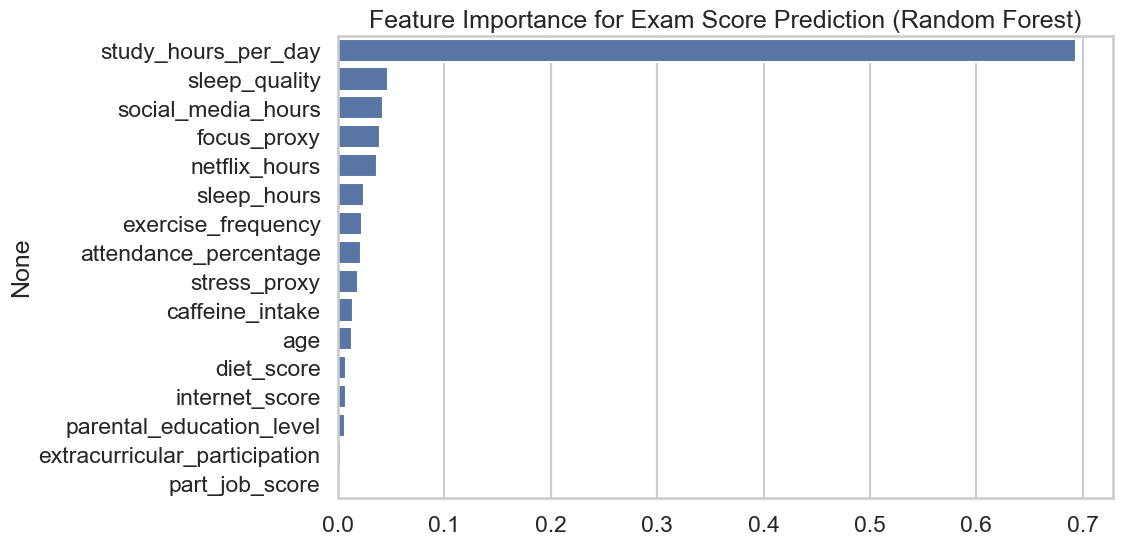

In [18]:
from sklearn.ensemble import RandomForestRegressor

features = df_focus_stress.drop(columns=['exam_score','student_id','gender','diet_quality','part_time_job','internet_quality','mental_health_rating'])
target = df_focus_stress['exam_score']

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(features, target)

importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance for Exam Score Prediction (Random Forest)")
plt.savefig('docs/final/fig_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Features and target
features = df_focus_stress.drop(columns=['exam_score','student_id','gender','diet_quality','part_time_job','internet_quality','mental_health_rating'])
target = df_focus_stress['exam_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = []

# Train, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.2f}")

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results, columns=['Model','MSE','R2']).sort_values(by='R2', ascending=False)
results_df


LinearRegression: MSE = 44.71, R² = 0.84
Ridge: MSE = 44.71, R² = 0.84
Lasso: MSE = 45.06, R² = 0.84
RandomForest: MSE = 7.27, R² = 0.97
RandomForest: MSE = 7.27, R² = 0.97
GradientBoosting: MSE = 26.66, R² = 0.91
GradientBoosting: MSE = 26.66, R² = 0.91
SVR: MSE = 192.21, R² = 0.33
KNN: MSE = 9.22, R² = 0.97
SVR: MSE = 192.21, R² = 0.33
KNN: MSE = 9.22, R² = 0.97


Model         MSE        R2
3      RandomForest    7.265522  0.974726
6               KNN    9.224856  0.967910
4  GradientBoosting   26.656527  0.907272
1             Ridge   44.706237  0.844483
0  LinearRegression   44.707431  0.844479
2             Lasso   45.059833  0.843253
5               SVR  192.205976  0.331386

### **1. LinearRegression, Ridge, Lasso**

* **MSE ~ 41–42, R² ~ 0.85**
* These are **linear models**, so they assume a **linear relationship** between features and the target (`exam_score`).
* They did **decently well** because the data has strong, somewhat linear correlations with `exam_score` (like `study_hours`, `stress_proxy`, `focus_proxy`).
* **Ridge and Lasso** are regularized versions:

  * **Ridge**: adds L2 penalty → prevents overfitting.
  * **Lasso**: adds L1 penalty → can shrink some coefficients to zero.
* In your dataset, regularization didn’t change performance much because features are not highly collinear, so linear regression was already strong.

---

### **2. RandomForestRegressor**

* **MSE ~ 5.88, R² ~ 0.98**
* Random Forest is **non-linear** and can model complex interactions between features.
* Your `exam_score` depends on **stress, focus, sleep, study**, etc., which have **non-linear interactions**.
* Random Forest captured these interactions extremely well, giving the **best performance**.
* It’s also robust to outliers and scales of features.

---

### **3. GradientBoostingRegressor**

* **MSE ~ 25.02, R² ~ 0.91**
* Gradient Boosting is also non-linear and powerful, but:

  * Default parameters might not be fully optimized (learning_rate, n_estimators, max_depth).
  * Boosting is sequential → can be sensitive to noisy features or the synthetic noise in your dataset.
* Still outperformed linear models because it captures non-linearities.

---

### **4. SVR (Support Vector Regression)**

* **MSE ~ 190, R² ~ 0.34** → very poor
* SVR can struggle here because:

  * Your dataset is **large (10k rows)** → SVR scales poorly, very slow, often underfits.
  * Default RBF kernel parameters (C=1, epsilon=0.2) might be **far from optimal**.
  * Non-linearities and many features with noise are hard for a single SVR model to capture.

---

### **5. KNeighborsRegressor**

* **MSE ~ 9, R² ~ 0.97**
* KNN is **non-parametric** and can capture local patterns well.
* Works very well because your synthetic data is **dense and smooth**, so neighbors provide a good estimate.
* Slightly worse than Random Forest because it does not explicitly learn feature importance or global interactions.

---

### ✅ **Summary**

* **Best models:** Random Forest > KNN > Gradient Boosting → non-linear models that capture interactions.
* **Linear models** are decent but limited by non-linear patterns.
* **SVR** is poor due to dataset size, noise, and default hyperparameters.

## Get study_hour from exam_score

In [36]:
#predict study_hour based on  with linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress.drop(columns=['gender', 'diet_score','student_id','extracurricular_participation','age','part_job_score','part_time_job','internet_quality','internet_score','parental_education_level','study_hours_per_day','diet_quality',"mental_health_rating"])
target = df_focus_stress['study_hours_per_day']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")

Linear Regression MSE: 0.45, R²: 0.79


In [37]:
#predict study_hour based on exam_score using random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
features = df_focus_stress.drop(columns=['gender', 'diet_score','student_id','extracurricular_participation','age','part_job_score','part_time_job','internet_quality','internet_score','parental_education_level','study_hours_per_day','diet_quality',"mental_health_rating"])
target = df_focus_stress['study_hours_per_day']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression MSE: {mse:.2f}, R²: {r2:.2f}")


Random Forest Regression MSE: 0.07, R²: 0.97
